# Association Rules - Books Problem
## ----------------------------------------------------------------------------------------------------------------------------

### Problem Statement : Prepare rules for the all the data sets 
* 1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
* 2) Change the minimum length in apriori algorithm
* 3) Visulize the obtained rules using different plots 


## 1. Import Libraries :

In [1]:
!pip install mlxtend

In [25]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## 2. Import dataset :

In [3]:
books_data = pd.read_csv('book.csv')
books_data

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


## 3. Data Understanding :

In [4]:
books_data.shape

(2000, 11)

In [5]:
books_data.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

## Apriori Algorithm :

### Apriori algorithm with 5% support and 80% confidence 

In [6]:
frequent_itemsets_1 = apriori(df = books_data,min_support = 0.05, use_colnames=True)
frequent_itemsets_1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(CookBks, YouthBks, DoItYBks, GeogBks)"
96,0.0560,"(CookBks, YouthBks, ArtBks, GeogBks)"
97,0.0650,"(GeogBks, ArtBks, CookBks, DoItYBks)"
98,0.0510,"(GeogBks, CookBks, DoItYBks, ChildBks, YouthBks)"


In [8]:
best_associates_1 = association_rules(df = frequent_itemsets_1, metric = 'confidence',min_threshold =0.8)
best_associates_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
1,"(YouthBks, DoItYBks)",(ChildBks),0.1155,0.423,0.0950,0.822511,1.944470,0.046143,3.250902
2,"(RefBks, YouthBks)",(ChildBks),0.0965,0.423,0.0830,0.860104,2.033342,0.042181,4.124481
3,"(GeogBks, YouthBks)",(ChildBks),0.1205,0.423,0.0990,0.821577,1.942262,0.048029,3.233884
4,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
...,...,...,...,...,...,...,...,...,...
57,"(GeogBks, ArtBks, DoItYBks)",(CookBks),0.0730,0.431,0.0650,0.890411,2.065919,0.033537,5.192125
58,"(GeogBks, CookBks, DoItYBks, YouthBks)",(ChildBks),0.0600,0.423,0.0510,0.850000,2.009456,0.025620,3.846667
59,"(GeogBks, ChildBks, YouthBks, DoItYBks)",(CookBks),0.0565,0.431,0.0510,0.902655,2.094327,0.026648,5.845182
60,"(GeogBks, ArtBks, CookBks, DoItYBks)",(ChildBks),0.0650,0.423,0.0535,0.823077,1.945808,0.026005,3.261304


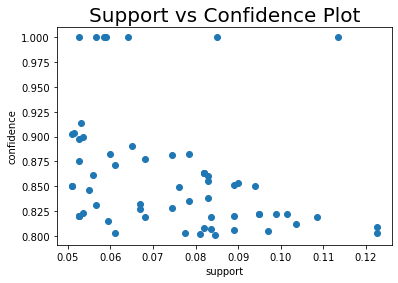

In [23]:
plt.scatter(best_associates_1['support'],best_associates_1['confidence'])
plt.title('Support vs Confidence Plot',fontsize = 20)
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

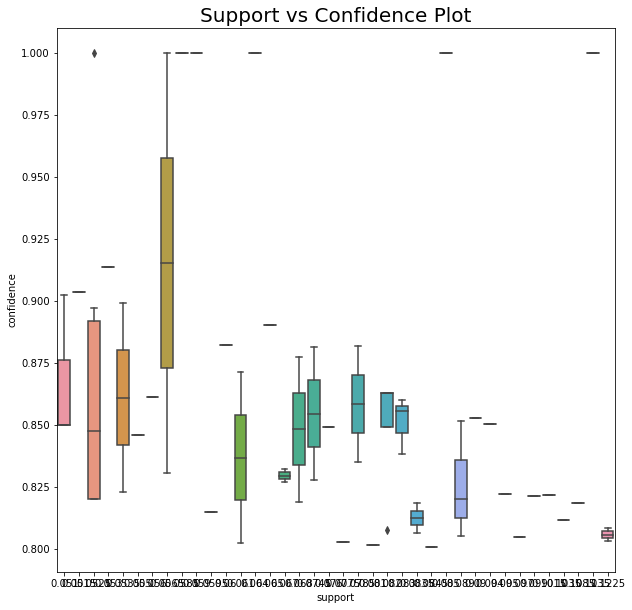

In [27]:
plt.figure(figsize=(10,10))
sns.boxplot(best_associates_1['support'],best_associates_1['confidence'])
plt.title('Support vs Confidence Plot',fontsize = 20)
plt.show()

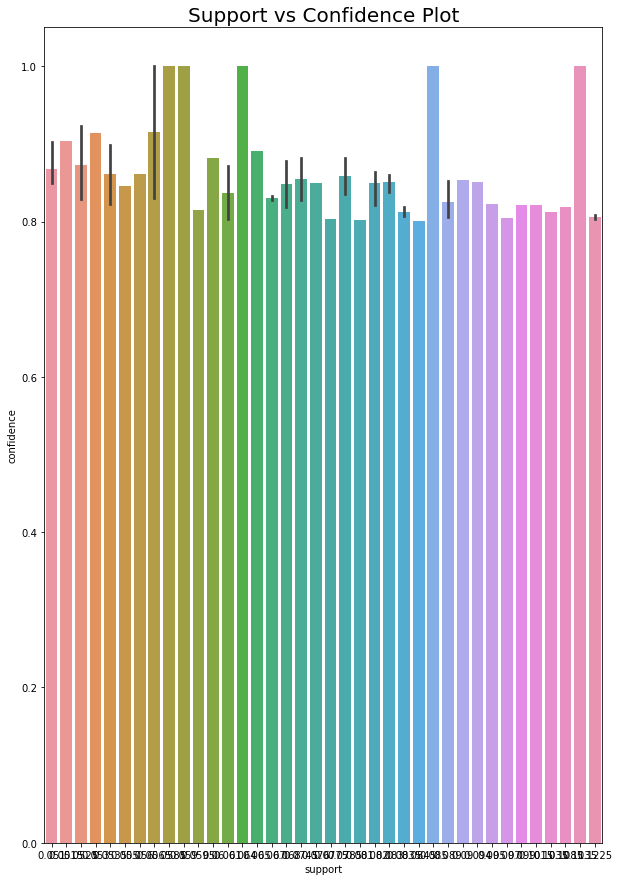

In [36]:
plt.figure(figsize=(10,15))
sns.barplot(best_associates_1['support'],best_associates_1['confidence'])
plt.title('Support vs Confidence Plot',fontsize = 20)
plt.show()

### Apriori algorithm with 10% support and 80% confidence

In [9]:
frequent_itemsets_2 = apriori(df = books_data,min_support = 0.10, use_colnames=True)
frequent_itemsets_2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [11]:
best_associates_2 = association_rules(df = frequent_itemsets_2, metric = 'confidence',min_threshold =0.8)
best_associates_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
1,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
2,"(RefBks, CookBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
3,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159
4,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354
5,"(GeogBks, ArtBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812


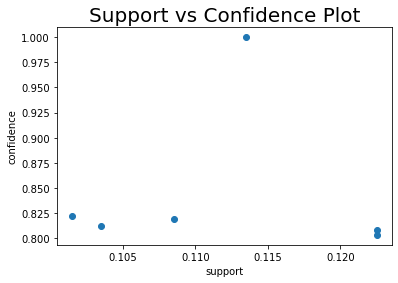

In [37]:
plt.scatter(best_associates_2['support'],best_associates_2['confidence'])
plt.title('Support vs Confidence Plot',fontsize = 20)
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

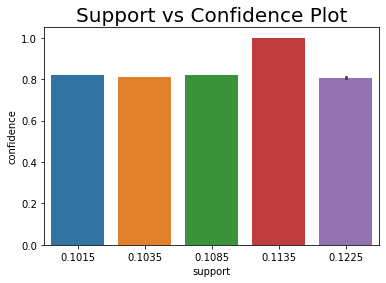

In [41]:
sns.barplot(best_associates_2['support'],best_associates_2['confidence'])
plt.title('Support vs Confidence Plot',fontsize = 20)
plt.show()

### Apriori algorithm with 3% support and 60% confidence

In [12]:
frequent_itemsets_3 = apriori(df = books_data,min_support = 0.03, use_colnames=True)
frequent_itemsets_3

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
176,0.0535,"(GeogBks, CookBks, DoItYBks, ChildBks, ArtBks)"
177,0.0405,"(GeogBks, RefBks, CookBks, ChildBks, ArtBks)"
178,0.0300,"(GeogBks, CookBks, ChildBks, ArtBks, ItalCook)"
179,0.0370,"(GeogBks, CookBks, DoItYBks, YouthBks, ArtBks)"


In [18]:
best_associates_3 = association_rules(df = frequent_itemsets_3, metric = 'confidence',min_threshold =0.6)
best_associates_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
2,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
3,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
4,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
...,...,...,...,...,...,...,...,...,...
295,"(GeogBks, CookBks, ChildBks, YouthBks, ArtBks)",(DoItYBks),0.0465,0.2820,0.0310,0.666667,2.364066,0.017887,2.154000
296,"(GeogBks, DoItYBks, ChildBks, YouthBks, ArtBks)",(CookBks),0.0335,0.4310,0.0310,0.925373,2.147037,0.016561,7.624600
297,"(CookBks, DoItYBks, ChildBks, YouthBks, ArtBks)",(GeogBks),0.0445,0.2760,0.0310,0.696629,2.524019,0.018718,2.386519
298,"(GeogBks, ArtBks, YouthBks, DoItYBks)","(ChildBks, CookBks)",0.0395,0.2560,0.0310,0.784810,3.065665,0.020888,3.457412


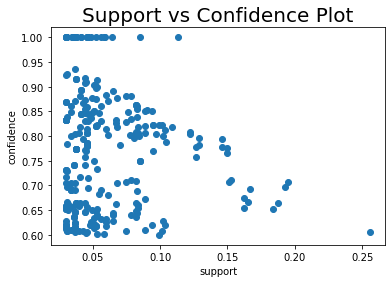

In [42]:
plt.scatter(best_associates_3['support'],best_associates_3['confidence'])
plt.title('Support vs Confidence Plot',fontsize = 20)
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

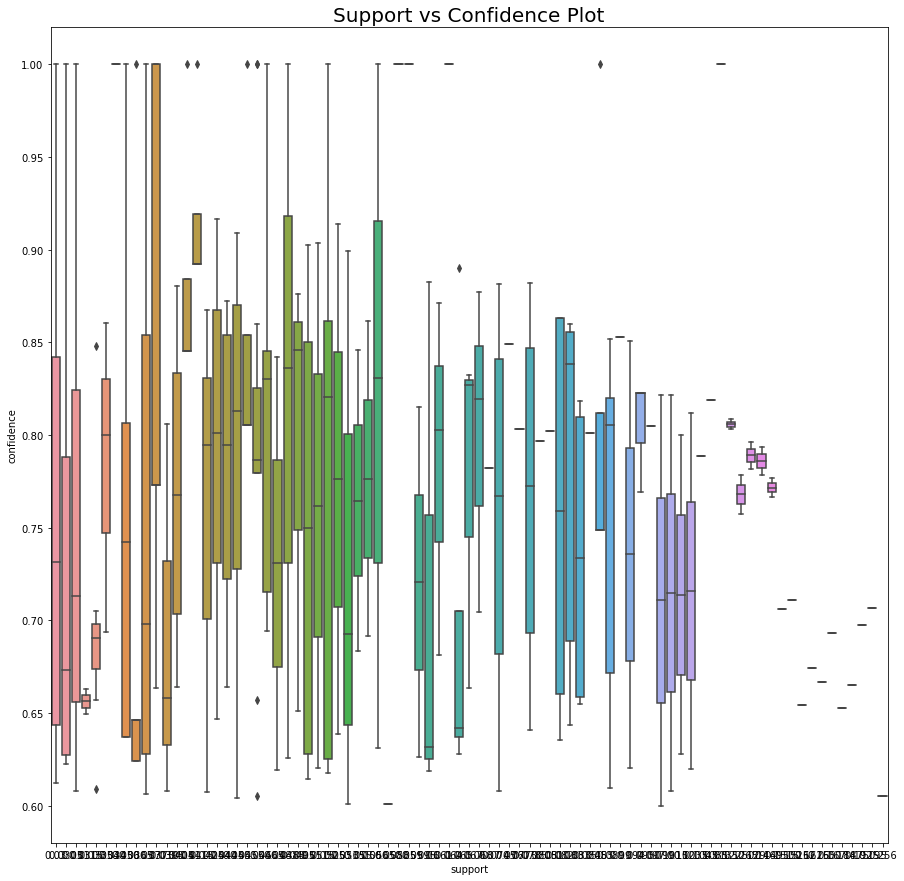

In [46]:
plt.figure(figsize=(15,15))
sns.boxplot(best_associates_3['support'],best_associates_3['confidence'])
plt.title('Support vs Confidence Plot',fontsize = 20)
plt.show()

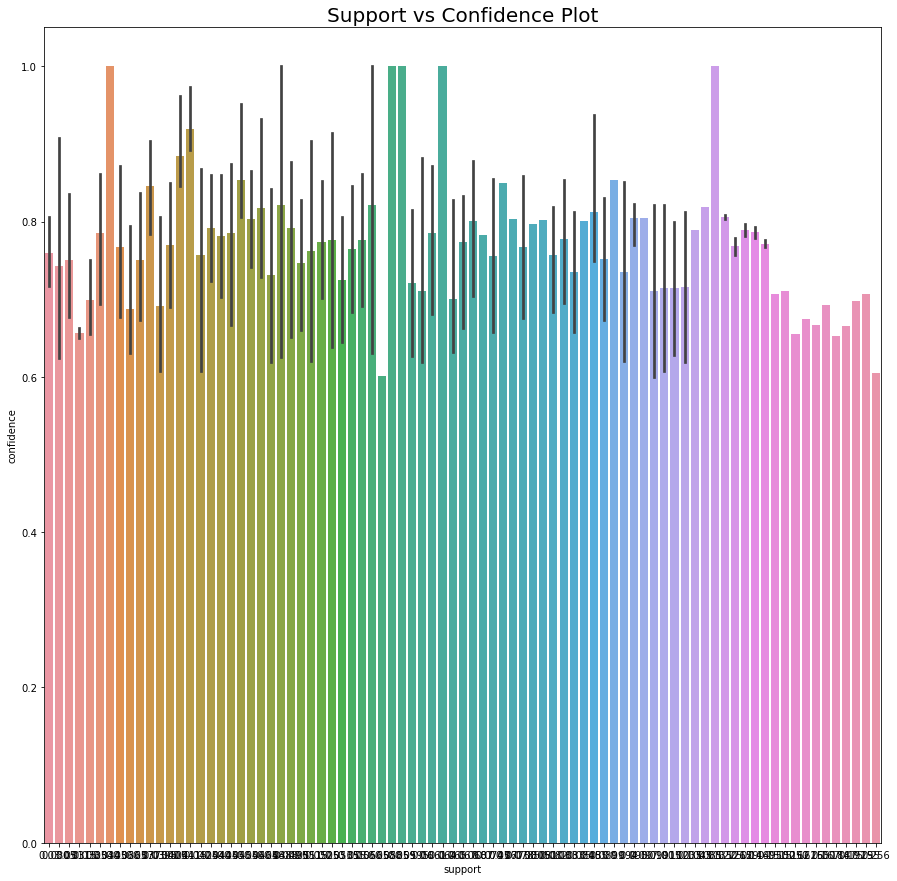

In [48]:
plt.figure(figsize=(15,15))
sns.barplot(best_associates_3['support'],best_associates_3['confidence'])
plt.title('Support vs Confidence Plot',fontsize = 20)
plt.show()

### Apriori algorithm with 10% support and 60% confidence

In [19]:
frequent_itemsets_4 = apriori(df = books_data,min_support = 0.1, use_colnames=True)
frequent_itemsets_4

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [17]:
best_associates_4 = association_rules(df = frequent_itemsets_4, metric = 'confidence',min_threshold =0.6)
best_associates_4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
3,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
4,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
5,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
6,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105
7,(DoItYBks),(CookBks),0.2820,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
8,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
9,(ArtBks),(CookBks),0.2410,0.431,0.1670,0.692946,1.607763,0.063129,1.853095


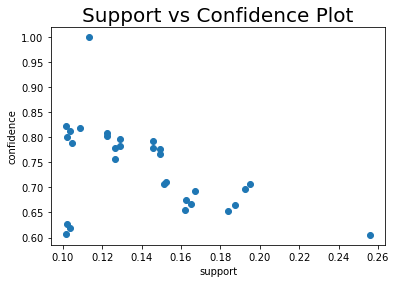

In [49]:
plt.scatter(best_associates_4['support'],best_associates_4['confidence'])
plt.title('Support vs Confidence Plot',fontsize = 20)
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

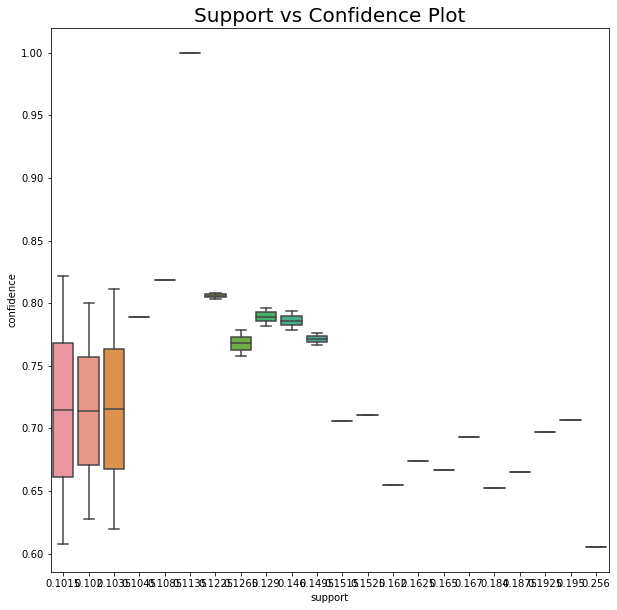

In [50]:
plt.figure(figsize=(10,10))
sns.boxplot(best_associates_4['support'],best_associates_4['confidence'])
plt.title('Support vs Confidence Plot',fontsize = 20)
plt.show()

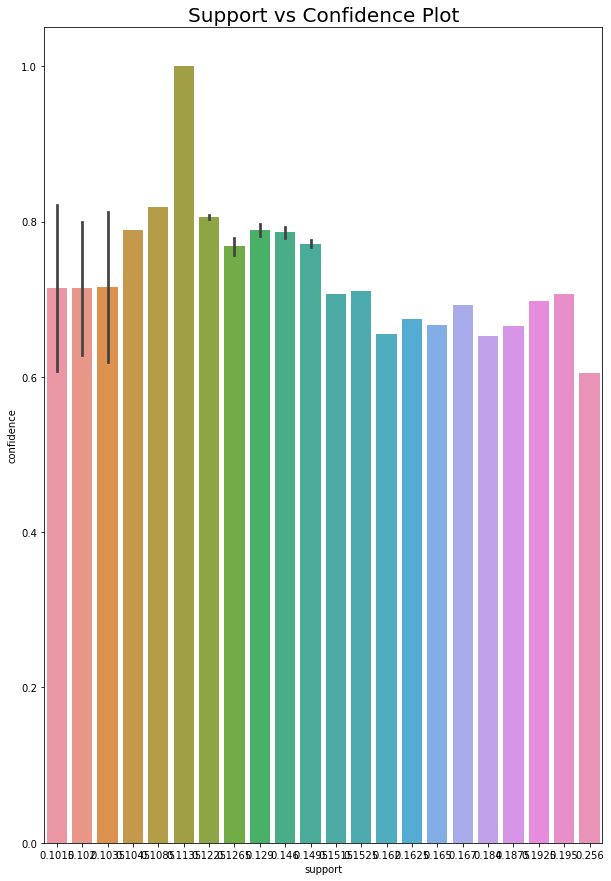

In [51]:
plt.figure(figsize=(10,15))
sns.barplot(best_associates_4['support'],best_associates_4['confidence'])
plt.title('Support vs Confidence Plot',fontsize = 20)
plt.show()